In [1]:
import numpy as np
from matplotlib import pyplot as plt, animation as animation, ticker as mticker
from matplotlib.pyplot import cm
import pandas as pd
from tqdm.notebook import tqdm

from fireworks.particles import Particles
import fireworks.nbodylib.nunits as NU
import fireworks.nbodylib.potentials as fnp
import fireworks.nbodylib.dynamics as fnd
import fireworks.nbodylib.integrators as fni

In [2]:
 N = 500
initial_position = 10   #pos del 
M_G = 1e3               # mass of the galaxy

Move to Center of mass reference frame: 
 pos Center of Mass: [-2.38524478e-17 -8.67361738e-18  5.20417043e-18] vel Center of Mass [ 6.93889390e-18  6.93889390e-18 -2.77555756e-17]
Move Center of mass to x=5, y=z=0: 
 pos Center of Mass: [ 1.00000000e+01 -8.67361738e-18  5.20417043e-18] vel Center of Mass [ 6.93889390e-18  6.93889390e-18 -2.77555756e-17]
Give Center of Mass to vel_x=vel_z=0, vel_y=sqrt(M_G/x): 
 pos Center of Mass: [ 1.00000000e+01 -8.67361738e-18  5.20417043e-18] vel Center of Mass [ 6.93889390e-18  1.00000000e+01 -2.77555756e-17]


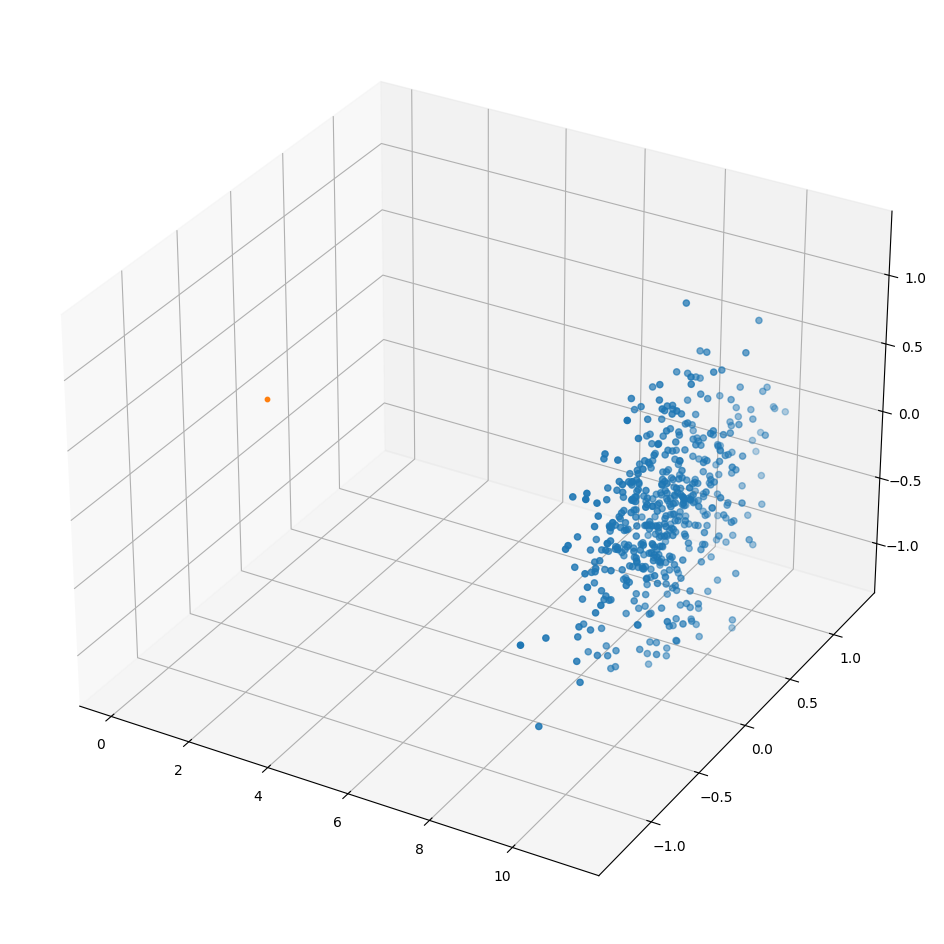

In [3]:
# the Particles are already in Henon units, so in Nbody units
path = './data/Plummer_Nbody_virial_' + str(N) + '.csv'
data = pd.read_csv(path).values
particles = Particles(position= data[:, 4:],  velocity = data[:, 1:4], mass = data[:, 0])
particles.set_flag(np.ones(shape=particles.mass.shape))


# move the stars in the frame of reference of the center of mass
particles.pos = particles.pos - particles.com_pos()
particles.vel = particles.vel - particles.com_vel()
print('Move to Center of mass reference frame:', '\n', 'pos Center of Mass:', particles.com_pos(), 'vel Center of Mass', particles.com_vel())

# move the stars in circular orbit 
particles.pos[:, 0] = particles.pos[:, 0] + initial_position*np.ones(len(particles))
print('Move Center of mass to x=5, y=z=0:', '\n', 'pos Center of Mass:', particles.com_pos(), 'vel Center of Mass', particles.com_vel())

particles.vel[:, 1] = particles.vel[:, 1] + np.sqrt(M_G / particles.com_pos()[0]) 
print('Give Center of Mass to vel_x=vel_z=0, vel_y=sqrt(M_G/x):', '\n', 'pos Center of Mass:', particles.com_pos(), 'vel Center of Mass', particles.com_vel())

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(xs = particles.pos[:, 0], ys = particles.pos[:, 1], zs = particles.pos[:, 2])
ax.scatter(xs = 0, ys = 0, zs = 0, s=10)